# Aufgabe 31: Data Mining Anwendung – Energie Rekonstruktion

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import h5py
import pandas as pd

In [5]:
df = pd.read_hdf('image_parameters_smd_reduced.hdf5') # loading the data

df = df[df.corsika_run_header_particle_id == 1]
df = df[df.corsika_event_header_total_energy > 500]
df.corsika_event_header_total_energy = np.log10(df.corsika_event_header_total_energy) # Das ist sinnvoll, weil energy und charges unterschiedliche Größenordnungen haben.
# Dann wird energy nicht überbewertet
#print(df)

size = np.asarray(df['size'])
width = np.asarray(df.width)
length = np.asarray(df.length)
num_pixel_in_shower = np.asarray(df.num_pixel_in_shower)
photoncharge_shower_mean = np.asarray(df.photoncharge_shower_mean)
X = np.vstack((size, width, length, num_pixel_in_shower, photoncharge_shower_mean)).T
y = np.asarray(df.corsika_event_header_total_energy)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [6]:
# Ich habe nicht wirklich eine Ahnung wie man die Parameter am besten wählen sollte
forest = RandomForestRegressor(n_estimators = 10, max_depth = 20, random_state = 0)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

In [7]:
def evaluate_performance(y_true, y_pred):
    # So wie in der Aufgabe angegeben erst mal paar Sachen berechnen
    delta_y = y_true - y_pred
    mean_delta_y = np.mean(delta_y)
    sigma_delta_y = np.std(delta_y, ddof = 1)
    mean_y_true = np.mean(y_true)
    sigma_y_true = np.std(y_true)
    print(mean_delta_y)
    print(sigma_delta_y)
    print(sigma_y_true)
    plt.hist(delta_y, bins = 100, range = (mean_delta_y - 3*sigma_delta_y, mean_delta_y + 3*sigma_delta_y))
    plt.show()
    plt.clf()
    plt.hexbin(y_pred, y_true, mincnt=1)
    cb = plt.colorbar()
    plt.show()
    plt.clf()

-0.00189674694352
0.207155139574
0.328909035608


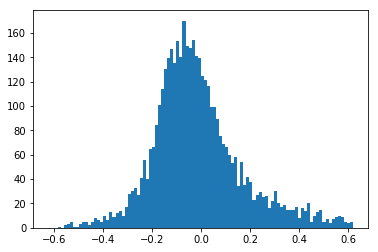

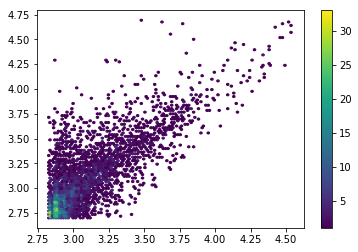

In [10]:
n = [10]
for n_estimators in n:
    forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = 10, random_state = 0)
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    evaluate_performance(y_test, y_pred)
# Das sieht fast wie in der Vorlesung aus 

In [11]:
with h5py.File("smd_deeplearning_gammas_reduced.hdf5", "r") as f:
    
    energy = f['energy'][:]
    
    charges = f['charges'][:]
    print(charges) # Warum sind das nans? So kann ich leider nicht arbeiten ...

energy = np.log10(energy)
print(energy)
print(charges)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

[[[[ nan]
   [ nan]
   [ nan]
   ..., 
   [ nan]
   [ nan]
   [ nan]]

  [[ nan]
   [ nan]
   [ nan]
   ..., 
   [ nan]
   [ nan]
   [ nan]]

  [[ nan]
   [ nan]
   [ nan]
   ..., 
   [ nan]
   [ nan]
   [ nan]]

  ..., 
  [[ nan]
   [ nan]
   [ nan]
   ..., 
   [ nan]
   [ nan]
   [ nan]]

  [[ nan]
   [ nan]
   [ nan]
   ..., 
   [ nan]
   [ nan]
   [ nan]]

  [[ nan]
   [ nan]
   [ nan]
   ..., 
   [ nan]
   [ nan]
   [ nan]]]


 [[[ nan]
   [ nan]
   [ nan]
   ..., 
   [ nan]
   [ nan]
   [ nan]]

  [[ nan]
   [ nan]
   [ nan]
   ..., 
   [ nan]
   [ nan]
   [ nan]]

  [[ nan]
   [ nan]
   [ nan]
   ..., 
   [ nan]
   [ nan]
   [ nan]]

  ..., 
  [[ nan]
   [ nan]
   [ nan]
   ..., 
   [ nan]
   [ nan]
   [ nan]]

  [[ nan]
   [ nan]
   [ nan]
   ..., 
   [ nan]
   [ nan]
   [ nan]]

  [[ nan]
   [ nan]
   [ nan]
   ..., 
   [ nan]
   [ nan]
   [ nan]]]


 [[[ nan]
   [ nan]
   [ nan]
   ..., 
   [ nan]
   [ nan]
   [ nan]]

  [[ nan]
   [ nan]
   [ nan]
   ..., 
   [ nan]
   [ nan